In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
from sklearn.datasets import fetch_olivetti_faces  # 머신러닝 lib
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
pip install pyreadstat

In [4]:
import pandas as pd
import numpy as np

df = pd.read_spss('/content/drive/MyDrive/sample_data/한국복지패널2019.sav')
df = df.rename(columns={'h14_g3' : '성별', 'h14_g4': '출생연도', 'h14_g10' :'결혼 유무', 'h14_g11' : '종교' ,'p1402_8aq1' : '급여', 'h14_eco9' :'직업코드', 'h14_reg7': '지역코드'})
df = df.loc[:,['성별', '출생연도', '결혼 유무', '종교', '급여', '직업코드', '지역코드']]

df['나이'] = (2019.0 - df['출생연도']) + 1

df['성별'] = np.where(df['성별']== 1.0 , '남자','여자')

df = df.assign(나이구간 = np.where(df['나이']<30,'청년', np.where(df['나이']<=45,'중년', np.where(df['나이']<=64,'장년' , '노인'))))

list_job = pd.read_excel('/content/drive/MyDrive/sample_data/Koweps_Codebook_2019.xlsx', sheet_name='직종코드')

# inplace = True 바뀐 컬럼을 바로 적용시킨다
list_job.rename(columns={'code_job':'직업코드','job':'직업'},inplace=True)

df = df.merge(list_job, how = 'left', on = '직업코드')

df

,성별,출생연도,결혼 유무,종교,급여,직업코드,지역코드,나이,나이구간,직업
0,여자,1945.0,2.0,1.0,NaN,NaN,1.0,75.0,노인,NaN
1,남자,1948.0,2.0,2.0,NaN,NaN,1.0,72.0,노인,NaN
2,남자,1942.0,3.0,1.0,107.0,762.0,1.0,78.0,노인,전기공
3,남자,1962.0,1.0,1.0,192.0,855.0,1.0,58.0,장년,금속기계 부품 조립원
4,여자,1963.0,1.0,1.0,NaN,NaN,1.0,57.0,장년,NaN
...,...,...,...,...,...,...,...,...,...,...
14413,여자,1967.0,1.0,1.0,NaN,NaN,5.0,53.0,장년,NaN
14414,여자,1992.0,5.0,1.0,NaN,NaN,5.0,28.0,청년,NaN
14415,남자,1995.0,5.0,1.0,NaN,910.0,5.0,25.0,청년,건설 및 광업 단순 종사자
14416,여자,1998.0,5.0,1.0,200.0,246.0,5.0,22.0,청년,보건 의료 관련 종사자


In [5]:
# 지역별 노인인구 비율
df['지역코드']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14413    5.0
14414    5.0
14415    5.0
14416    5.0
14417    5.0
Name: 지역코드, Length: 14418, dtype: float64

In [6]:
df_city = pd.DataFrame({'지역코드' : [1,2,3,4,5,6,7],
                        '지역명': ['서울', '수도권(인천/경기)', '부산/경남/울산', '대구/경북', '대전/충남', '강원/충북', '광주/전남/전북/제주도']})
df_city

,지역코드,지역명
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [7]:
df = df.merge(df_city, how = 'left', on='지역코드')
df

,성별,출생연도,결혼 유무,종교,급여,직업코드,지역코드,나이,나이구간,직업,지역명
0,여자,1945.0,2.0,1.0,NaN,NaN,1.0,75.0,노인,NaN,서울
1,남자,1948.0,2.0,2.0,NaN,NaN,1.0,72.0,노인,NaN,서울
2,남자,1942.0,3.0,1.0,107.0,762.0,1.0,78.0,노인,전기공,서울
3,남자,1962.0,1.0,1.0,192.0,855.0,1.0,58.0,장년,금속기계 부품 조립원,서울
4,여자,1963.0,1.0,1.0,NaN,NaN,1.0,57.0,장년,NaN,서울
...,...,...,...,...,...,...,...,...,...,...,...
14413,여자,1967.0,1.0,1.0,NaN,NaN,5.0,53.0,장년,NaN,대전/충남
14414,여자,1992.0,5.0,1.0,NaN,NaN,5.0,28.0,청년,NaN,대전/충남
14415,남자,1995.0,5.0,1.0,NaN,910.0,5.0,25.0,청년,건설 및 광업 단순 종사자,대전/충남
14416,여자,1998.0,5.0,1.0,200.0,246.0,5.0,22.0,청년,보건 의료 관련 종사자,대전/충남


In [8]:
df[['지역코드','지역명']]

,지역코드,지역명
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울
...,...,...
14413,5.0,대전/충남
14414,5.0,대전/충남
14415,5.0,대전/충남
14416,5.0,대전/충남


In [ ]:
# pip install --upgrade pandas

In [10]:
df_loc = df.groupby('지역명', as_index=False)['나이구간'].value_counts(normalize=True)
df_loc

,지역명,나이구간,proportion
0,강원/충북,노인,0.391381
1,강원/충북,장년,0.248021
2,강원/충북,청년,0.232190
3,강원/충북,중년,0.128408
4,광주/전남/전북/제주도,노인,0.383212
5,광주/전남/전북/제주도,장년,0.241687
6,광주/전남/전북/제주도,청년,0.232766
7,광주/전남/전북/제주도,중년,0.142336
8,대구/경북,노인,0.434028
9,대구/경북,장년,0.242477


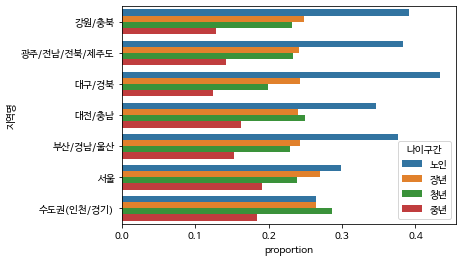

In [11]:
import seaborn as sns
sns.barplot(data=df_loc, y='지역명', x ='proportion',hue = '나이구간')

In [12]:
pivot_df = df_loc[['지역명','나이구간','proportion']].pivot(index='지역명', columns = '나이구간', values = 'proportion')
pivot_df

나이구간,노인,장년,중년,청년
지역명,,,,
강원/충북,0.391381,0.248021,0.128408,0.232190
광주/전남/전북/제주도,0.383212,0.241687,0.142336,0.232766
대구/경북,0.434028,0.242477,0.123843,0.199653
대전/충남,0.346513,0.240115,0.163192,0.250180
부산/경남/울산,0.375817,0.243056,0.152369,0.228758
서울,0.299201,0.270230,0.191808,0.238761
수도권(인천/경기),0.264633,0.264325,0.184227,0.286815


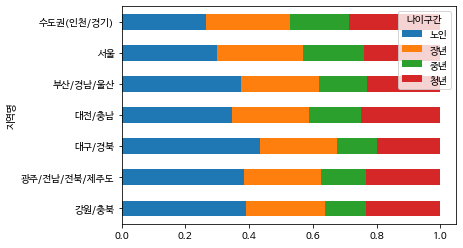

In [14]:
pivot_df.plot.barh(stacked=True)

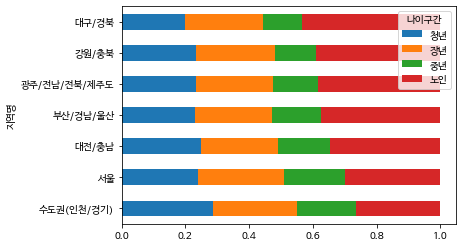

In [15]:
# 시각적으로 정렬
sort_df = pivot_df.sort_values(by='노인', ascending=True)[['청년','장년','중년','노인']]
sort_df.plot.barh(stacked=True)